<a href="https://colab.research.google.com/github/s-ahmed6786/Deep-Learning/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [89]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std=0.4)

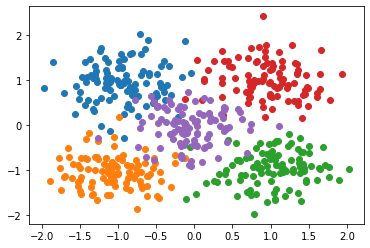

In [90]:
plt.scatter(X[y == 0, 0] , X[y == 0, 1])
plt.scatter(X[y == 1, 0] , X[y == 1, 1])
plt.scatter(X[y == 2, 0] , X[y == 2, 1])
plt.scatter(X[y == 3, 0] , X[y == 3, 1])
plt.scatter(X[y == 4, 0] , X[y == 4, 1])

In [91]:
y_cat = to_categorical(y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [92]:
model = Sequential()
model.add(Dense(units = 5, input_shape = (2, ), activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [93]:
h = model.fit(x = X, y = y_cat, verbose = 1, batch_size = 50, epochs= 100, shuffle = 'true')

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0893 - accuracy: 0.6640
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.8460
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8940
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.9400
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2779 - accuracy: 0.9460
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9420
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9500
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9500
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9520
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9480
Epoch 11/

Text(0.5, 1.0, 'accuracy')

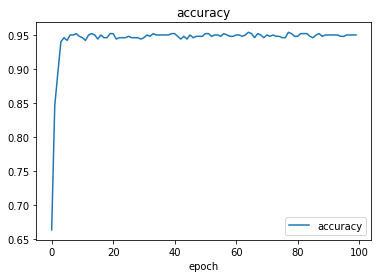

In [94]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

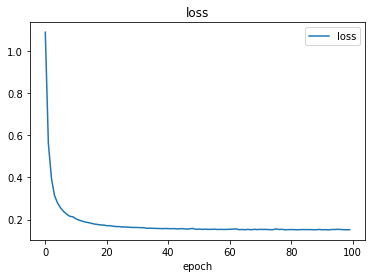

In [95]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [96]:
def plot_decision_boundary(X, y_cat, model):
  x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
  y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  classes_x = np.argmax(pred_func , axis=1)
  z = classes_x.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 2ms/step


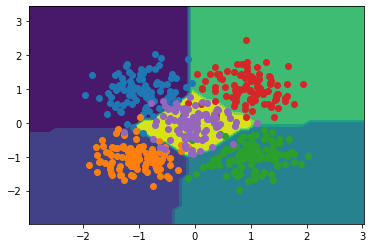

In [97]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y == 0, 0] , X[y == 0, 1])
plt.scatter(X[y == 1, 0] , X[y == 1, 1])
plt.scatter(X[y == 2, 0] , X[y == 2, 1])
plt.scatter(X[y == 3, 0] , X[y == 3, 1])
plt.scatter(X[y == 4, 0] , X[y == 4, 1])

1/1 [==============================] - 0s 30ms/step
Prediction is:  [3]


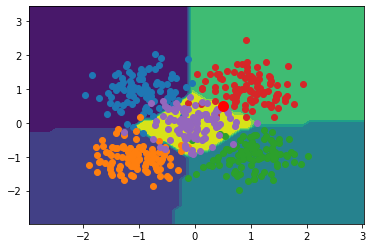

In [98]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y == 0, 0] , X[y == 0, 1])
plt.scatter(X[y == 1, 0] , X[y == 1, 1])
plt.scatter(X[y == 2, 0] , X[y == 2, 1])
plt.scatter(X[y == 3, 0] , X[y == 3, 1])
plt.scatter(X[y == 4, 0] , X[y == 4, 1])
x = 0.5
y = 0.5
point = np.array([[x,y]])
prediction = np.argmax(model.predict(point) , axis=1)
plt.plot([x], [y], marker = 'o', markersize = 10, color = "r")
print("Prediction is: ", prediction)